In [1]:
# python
import os
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from hist import intervals
import coffea.util
import numpy as np
import mplhep as hep

In [ ]:
### This notebook shows the electron min dxy in two different selections

In [2]:
##Backgrounds grouped into three.
QCD=[ 
     "QCD_Pt15To20", 
     "QCD_Pt20To30",
     "QCD_Pt30To50",
     "QCD_Pt50To80",
     "QCD_Pt80To120",
     "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
     "QCD_Pt470To600",
     "QCD_Pt600To800",
    "QCD_Pt800To1000",
     "QCD_Pt1000",
    ]
DY = [ 
    "DYJetsToMuMu_M10to50",
     "DYJetsToMuMu_M50",
     ]
TT = [ 
    "TTJets",
     ]

bgs= QCD + DY + TT

S = [

'2Mu2E_100GeV_5p0GeV_400mm',

'2Mu2E_200GeV_5p0GeV_200p0mm',

'2Mu2E_500GeV_5p0GeV_80p0mm',

'2Mu2E_800GeV_5p0GeV_50p0mm',


'2Mu2E_1000GeV_5p0GeV_40p0mm',
]

In [3]:
def sum_bgs_hist(bgs_list, histogram_name, channel_name):
    """
    Sum histograms for a list of backgrounds.
    """
    summed_hist = None
    
    for x in bgs_list:
        print(x)
        output_bg = coffea.util.load(f"output_{x}.coffea")
        hist = output_bg["out"][x]["hists"][histogram_name][channel_name, ::4j]
        
        if summed_hist is None:
            summed_hist = hist.copy()
        else:
            summed_hist += hist
    
    return summed_hist


TTJets
QCD_Pt15To20
QCD_Pt20To30
QCD_Pt30To50
QCD_Pt50To80
QCD_Pt80To120
QCD_Pt120To170
QCD_Pt170To300
QCD_Pt300To470
QCD_Pt470To600
QCD_Pt600To800
QCD_Pt800To1000
QCD_Pt1000


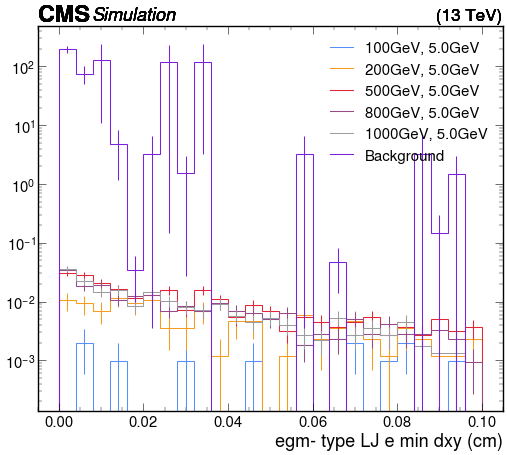

In [4]:

channel_name = "base_ljObjCut_ljIso_2lj"
histogram_name = "egm_lj_electron_min_dxy_XXXLowRange"
output_signal =  coffea.util.load(f"output_signal.coffea")
sum_bg = sum_bgs_hist(TT + QCD ,histogram_name, channel_name )
plt.figure(figsize=(12, 10))
label_list = []
for s in S:

    histogram = output_signal["out"][s]["hists"][histogram_name][channel_name, ::4j]
    utilities.plot(histogram, flow="none",)
    parts = s.split("_")
    mass = parts[1]
    zd_mass = parts[2].replace("p", ".")
    ctau = float(parts[3].replace("p", ".").replace("mm", ""))
    label = mass + ", "  + zd_mass
    label_list.append(label)

utilities.plot(sum_bg, flow="none", yerr= True)
plt.yscale("log")
plt.legend(label_list + ["Background"])

TTJets
QCD_Pt15To20
QCD_Pt20To30
QCD_Pt30To50
QCD_Pt50To80
QCD_Pt80To120
QCD_Pt120To170
QCD_Pt170To300
QCD_Pt300To470
QCD_Pt470To600
QCD_Pt600To800
QCD_Pt800To1000
QCD_Pt1000


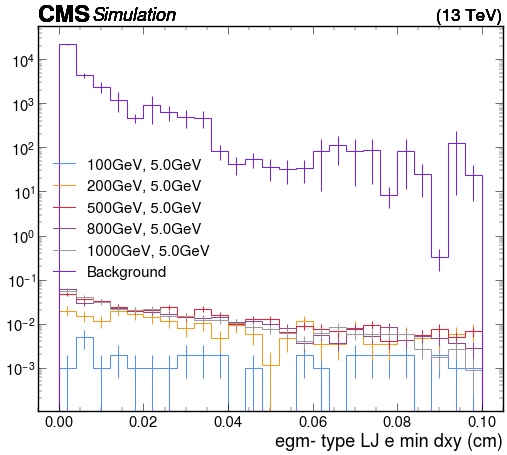

In [5]:

channel_name = "base_ljObjCut_ljIso"
histogram_name = "egm_lj_electron_min_dxy_XXXLowRange"
output_signal =  coffea.util.load(f"output_signal.coffea")
sum_bg = sum_bgs_hist(TT + QCD ,histogram_name, channel_name )
plt.figure(figsize=(12, 10))
label_list = []
for s in S:
    histogram = output_signal["out"][s]["hists"][histogram_name][channel_name, ::4j]
    utilities.plot(histogram, flow="none",)
    parts = s.split("_")
    mass = parts[1]
    zd_mass = parts[2].replace("p", ".")
    ctau = float(parts[3].replace("p", ".").replace("mm", ""))
    label = mass + ", "  + zd_mass
    label_list.append(label)

utilities.plot(sum_bg, flow="none", yerr= True)
plt.yscale("log")
plt.legend(label_list + ["Background"])